<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Introduction to AI and Data Science

Even Semester 2023/2024

Faculty of Computer Science, Universitas Indonesia

## **Lab *4*: *Clustering***

### **Deadline: Saturday, March 2nd, 2024 at 23:55**
</center>

#### **Guidelines:**

1. Lab document *template* in .ipynb format and dataset (if needed) have been provided on SCeLe.
2. Run the code in the .ipynb document and pay close attention to what the code snippet does and its output. Answer the **asserted questions** in the given program snippet.
3. Jupyter Notebook documents that have been completed with answers are collected in the format **Lab4_NPM_Name.ipynb**. Example: Lab4_2006123456_Arya.ipynb
4. Submit these documents onto the submission slot provided on SCeLe before **Deadline: Saturday, March 2nd, 2024 at 23:55**. Late submission will incur a score penalty.
5. Plagiarism is not permitted in any form. As for collaboration in the form of discussion (without copying or taking other people's answers) and literature, it is still permitted by properly crediting collaborators and sources.


In [96]:
# fill this with your name and ID
Name = "Muhammad Sakhran Thayyib"
NPM = "2206046790"

# Intro to Clustering

Clustering is an unsupervised learning task to identify underlying groups within a dataset. It works by grouping similar datapoints to a certain cluster. What does it mean by *similar datapoints*?

Well, we can measure similarity between datapoints by using a **similarity measure**. You may have heard about Jaccard similarity, Euclidean distance, Manhattan distance, etc. Those are similarity measures :)

In this tutorial, we will learn how to apply clustering on a dataset using three clustering algorithms: K-Means Clustering, Hierarchical Clustering, and DBSCAN Clustering.

This tutorial only provide general guides on how to do clustering. You should explore more on how to use certain methods or libraries by yourself. Reading the documentations would be very helpful :)

# Import Libraries

In [97]:
# you may add another libraries if necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import optuna


# Preparation

In this tutorial, we will use `glass.csv` dataset. This dataset is originally published by UCI Machine Learning on [Kaggle](https://www.kaggle.com/datasets/uciml/glass). The dataset contains some information regarding the oxide contents of a glass and the glass type. Originally, the dataset is intended for classification task, i.e. predicting the type of the glass based on its oxide contents. However, we will modify this dataset so that it can be applied for clustering task.

There are 10 columns in the dataset, as explained below:

1.   RI: refractive index
2.   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3.   Mg: Magnesium
4.   Al: Aluminum
5.   Si: Silicon
6.   K: Potassium
7.   Ca: Calcium
8.   Ba: Barium
9.   Fe: Iron
10.  Type: 1 (building_windows_float_processed), 2 (building_windows_non_float_processed), 3 (vehicle_windows_float_processed), 4 (vehicle_windows_non_float_processed), 5 (containers), 6 (tableware), 7 (headlamps)

In [98]:
# you may want to use this cell if you are working with Colab
# from google.colab import drive
# drive.mount('/content/drive')

# # change the directory
# %cd "/content/drive/MyDrive/Colab Notebooks/IAIDS Even 2324"

In [99]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


For this tutorial, we will drop the `Type` column since we are going to do unsupervised learning, but we will use the column later to validate the formed clusters.

In [100]:
type_col = df['Type'].to_numpy()
df = df.drop(columns=['Type'])
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


## [1a] Null Values Handling

You have to check the existence of null values in the dataset. If null values exist, handle the null values using your preferred method and explain the reason why do you choose that method.

In [101]:
# TODO
nullCheckBefore = df.isnull().values.any()
print(f"Are the any null values? {nullCheckBefore}")
df.fillna(0, inplace=True)
nullCheckAfter = df.isnull().values.any()
print(f"Are the any null values? {nullCheckAfter}")

Are the any null values? False
Are the any null values? False


## [1b] Descriptive Statistics and Brief EDA

### [1b1] Descriptive Statistics

Show the descriptive statistics of the dataset.

In [102]:
# TODO: which df method should you use?
describeDF = df.describe()
describeDF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### [1b2] Relation between Two Attributes

Visualize the relationship between two attributes for all attributes in the dataset and mention the top 3 attributes pairs that are highly related to each other.

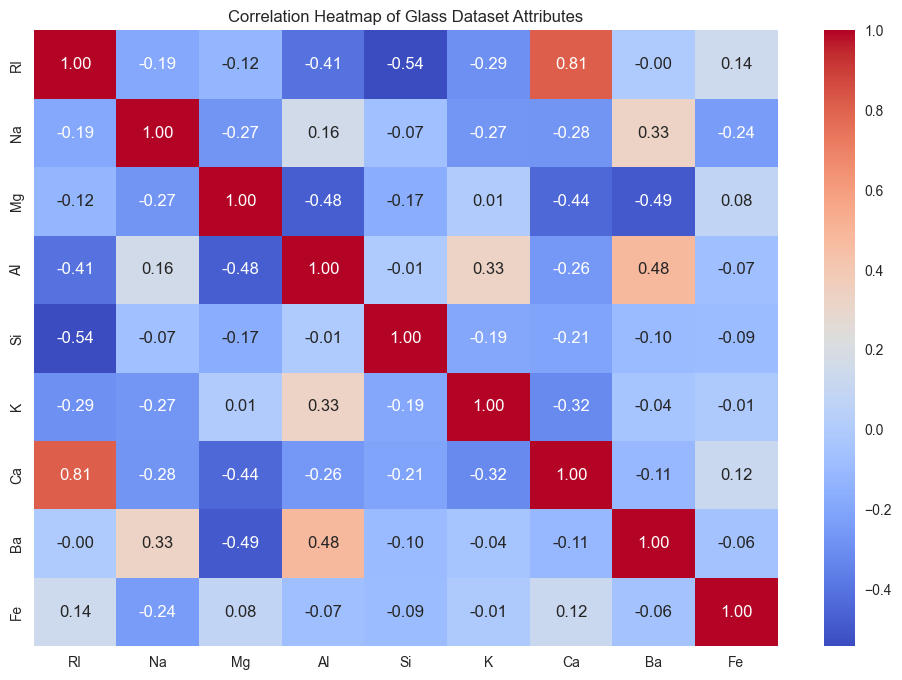

Top 3 Attribute Pairs with Highest Correlation:
RI  Ca    0.810403
Ca  RI    0.810403
Ba  Al    0.479404
dtype: float64


In [103]:
# TODO: visualize it!

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Glass Dataset Attributes')
plt.show()

# Find top 3 attribute pairs with highest correlation (excluding self-correlation)
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs != 1].head(3)

print("========================================================")
print("Top 3 Attribute Pairs with Highest Correlation:")
print(correlation_pairs)

Top 3 Attribute Pairs with Highest Correlation:
RI  Ca    0.810403
Ca  RI    0.810403
Ba  Al    0.479404
dtype: float64

## [1c] Normalization

Apply the normalization (min-max scaling) to all attributes in the dataset.

In [104]:
# TODO
# Apply Min-Max Scaling to all attributes
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


Do you think that normalization is important in clustering? Which type of clustering algorithm that is usually significantly impacted by the normalization process? Explain!

> Answer: 
In clustering algorithms, the distance between data points is one of the key factors in determening clustering membership. If the features aren't on the same scale, then there might be biases during clusterings.

# K-Means Clustering

## [2a] Determine Optimal Value of $K$

Use average silhouette coefficient metric to determine the optimal value of $K$. In this tutorial, you may try $2 \leq K \leq 8$. For reproducibility, you should use `n_init = 10` and `random_state = 30` in your K-Means instance.

In [105]:
# TODO

# Initialize lists to store silhouette scores
silhouette_scores = []
k_values = range(2, 9)

# Iterate over each value of K
for k in k_values:
    # Initialize KMeans instance
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=30)
    
    # Fit KMeans to the data
    kmeans.fit(df_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Find the optimal value of K with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print("Optimal value of K:", optimal_k)

Optimal value of K: 3


The optimal value of K is 3 (three)

## [2b] Applying K-Means Clustering

Apply the K-Means algorithm using the same hyperparameters as the preceding question. You have to use $K$ value that you have specified before. Create a new dataframe that contains the existing normalized dataframe added with one additional column, namely, `label`, that shows the assigned cluster. Display the first 5 rows of the newly-created dataframe.

In [106]:
# TODO
# Initialize KMeans instance with specified hyperparameters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=30)

# Fit KMeans to the scaled data
kmeans.fit(df_scaled)

# Create a new dataframe with an additional 'label' column showing the assigned cluster
df_with_labels = df_scaled.copy()
df_with_labels['label'] = kmeans.labels_
df_with_labels.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,label
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0


## [2c] Visualize Silhouette Score for K-Means Clustering

Visualize the Silhouette Score using Silhouette Plot. You can use `SilhouetteVisualizer` from `Yellowbrick`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


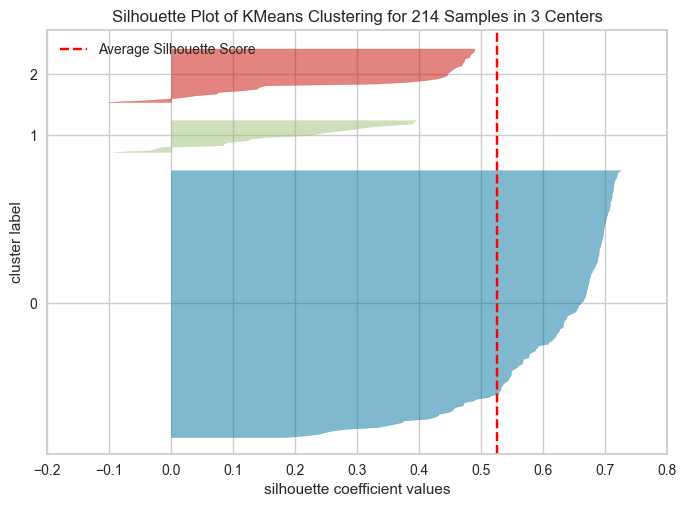

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 214 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
# TODO: Visualize
visualise = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualise.fit(df_scaled)
visualise.show()

Give a brief explanation about your interpretation on the Silhouette Plot.



> Answer:
The silhouette plot displays the coefficient for each sample on a per-cluster basis, it visualises which clusters are dense and which aren't. It is useful for determining whether the clusters are balanced or not, and for selecting a value for comparing multiple visualisers. 

## [2d] Visualize the Formed Clusters

Visualize the formed clusters using a 2-dimensional plot. You have to apply dimensionality reduction to the features beforehand, since the dataset consists of more than 2 features. You can use [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for this dimensionality reduction, with `random_state = 30` for the sake of reproducibility.

t-SNE is a dimensionality reduction technique that is commonly used to visualize high-dimensional data in a lower-dimensional space, often in 2-dimensional space. The main advantage of t-SNE is the ability of this algorithm to preserve local structure. This means that points which are close to one another in the high-dimensional data will tend to be close also in the lower-dimensional one. By using this technique, one can get a 'rough' representation about the distribution of data in the higher-dimensional space. You can read about this more [here](https://www.displayr.com/using-t-sne-to-visualize-data-before-prediction/).

### [2d1] t-SNE Dimensionality Reduction

In [108]:
from sklearn.manifold import TSNE

In [109]:
# TODO
# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=30)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne

array([[ -3.8072982 ,   1.4953274 ],
       [  1.4669582 ,  -3.3763952 ],
       [  4.424757  ,  -6.6821284 ],
       [ -1.0244567 ,  -4.006025  ],
       [ -2.1260245 ,  -6.0561886 ],
       [-15.562561  ,  -0.45971945],
       [ -2.4606798 ,  -6.1508827 ],
       [ -2.9939559 ,  -6.984024  ],
       [ -1.8604609 ,  -0.4224485 ],
       [-12.134167  ,  -3.3725977 ],
       [-15.753394  ,  -1.3383193 ],
       [ -1.2377524 ,  -8.36698   ],
       [-15.905009  ,  -1.1503291 ],
       [-13.81983   ,  -1.9185789 ],
       [ -1.1651866 ,  -9.905711  ],
       [ -1.7043862 ,  -9.134028  ],
       [ -2.1404328 ,  -8.694148  ],
       [ -4.5186434 ,   2.3083174 ],
       [ -2.8137994 ,   0.02631168],
       [-10.572815  ,  -4.912247  ],
       [-14.438077  ,  -1.8276856 ],
       [ -4.4994698 ,   3.5197103 ],
       [ -0.5031498 ,  -7.597613  ],
       [ -0.40444833,  -8.544139  ],
       [ -1.274968  ,  -5.425521  ],
       [ -1.5966128 ,  -7.477141  ],
       [ -0.17841409,  -4.3925934 ],
 

### [2d2] Clusters Visualization

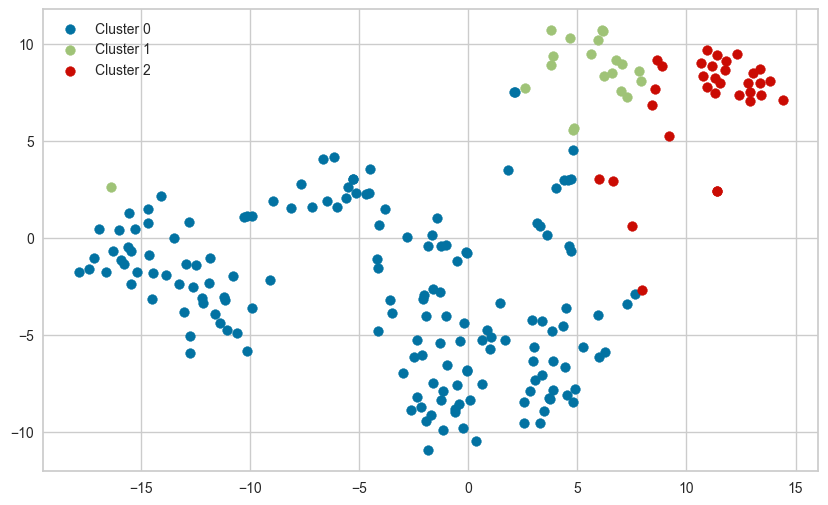

In [110]:
# TODO: Visualize using scatterplot
plt.figure(figsize=(10, 6))
for label in df_with_labels['label'].unique():
    plt.scatter(df_tsne[df_with_labels['label'] == label, 0],
                df_tsne[df_with_labels['label'] == label, 1],
                label = 'Cluster {}'.format(label))

plt.legend()
plt.show()

## [2e] Cluster Interpretation

Based on the visualized clusters, give a brief interpretation on the clusters. Can you spot some datapoints that are considered to be misclustered?




> Answer:
The code has successfully grouped the data points into clusters. Although there is a single data point that seemed misclustered, specifically the one to the left. It was grouped into the greens, but is technically closer to the blues.


## [2f] Feature Selection on Clustering

Using $K=3$, apply feature selection to the normalized dataset before doing clustering, such that the number of features after selection is reduced to 3. Evaluate the result using Average Silhouette Score. You have to try EVERY possible combination of triplets. Use the same hyperparameters as the previous questions. State explicitly which combination produces the best result.

In [111]:
# generate permutation of triplets
# hint: use itertools
import itertools

In [112]:
# TODO

silhouette_scores = []
k = 3

# Generate permutation of triplets
triplets = list(itertools.combinations(df_scaled.columns, 3))

# Iterate over each triplet
for triplet in triplets:
    # Select the triplet of features
    selected_features = df_scaled[list(triplet)]
    
    # Initialize KMeans instance
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=30)
    
    # Fit KMeans to the data
    kmeans.fit(selected_features)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(selected_features, kmeans.labels_)
    
    # Append silhouette score to list
    silhouette_scores.append((triplet, silhouette_avg))

# Find the combination with the highest silhouette score
best_combination = max(silhouette_scores, key=lambda x: x[1])

# Print the best combination
print("Best combination:", best_combination)

Best combination: (('Mg', 'K', 'Ca'), 0.756027206884036)


We can see that the best combination is 'Mg', 'K', 'Ca', with the average silhouette score is 0.75602720688403 

# Hierarchical Clustering

## [3a] Applying Hierarchical Clustering

Apply hierarchical agglomerative clustering to normalized dataset using all features. Use $K = 3$ as the number of clusters with complete linkage and Euclidean distance. Add a new column to normalized dataset (name: `agg_label`) which contains cluster labels for each datapoint and display the first 5 rows of dataframe.

In [113]:
# TODO
# Apply Hierarchical Agglomerative Clustering
k = 3
agg_cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
dfKopi = df_scaled.copy()
dfKopi['agg_label'] = agg_cluster.fit_predict(dfKopi)
dfKopi.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,agg_label
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0


## [3b] Dendogram Plot

Create a dendogram plot for the normalized dataset using complete linkage and Euclidean distance.

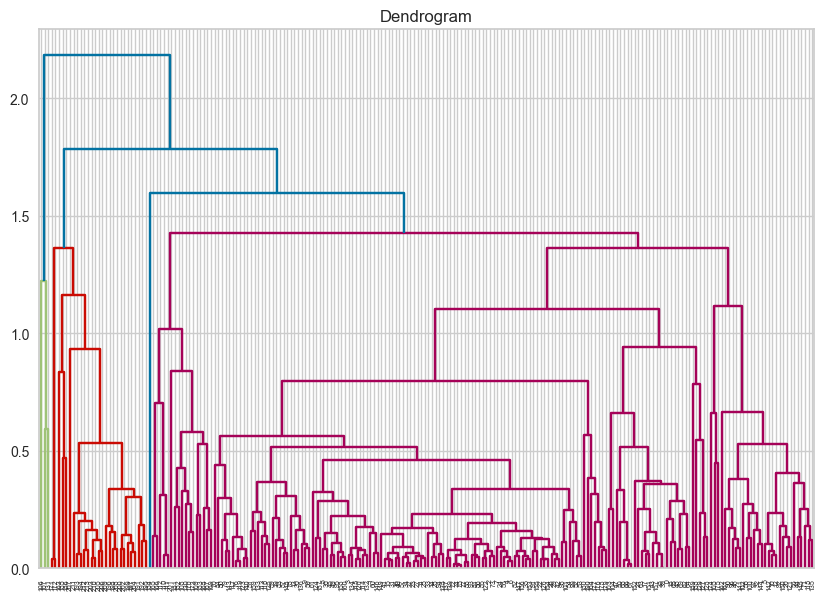

In [114]:
# TODO
# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete', metric='euclidean'))
plt.show()

## [3c] Dendogram Interpretation

Change previous dendogram for better interpretation by condensing it. Use level `truncate_mode` with p = 6 (read [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) for reference). Display the plot after condensing it.

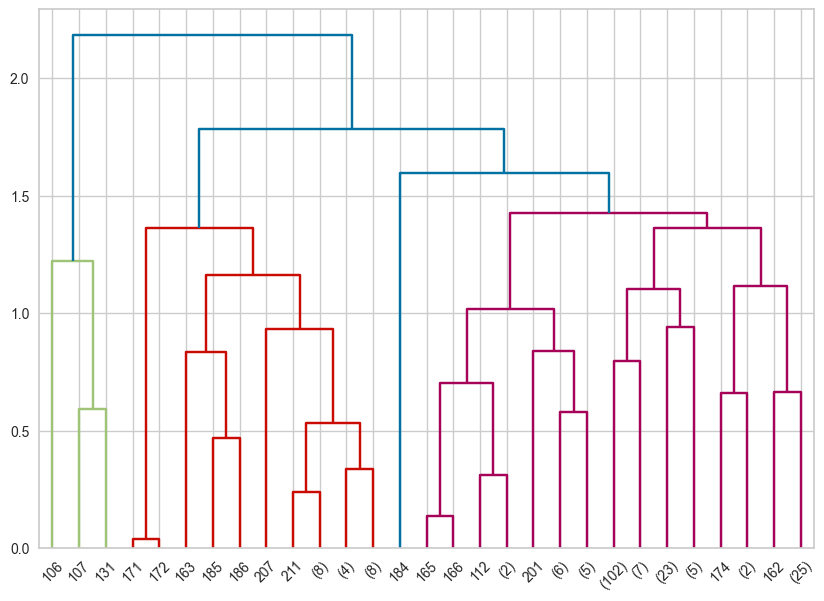

In [115]:
# TODO
yeah = sch.linkage(df_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(10, 7))
dendogram = sch.dendrogram(yeah, truncate_mode='level', p=6)
plt.show()

If you want to create 7 clusters, plot a line where you should truncate the dendogram.

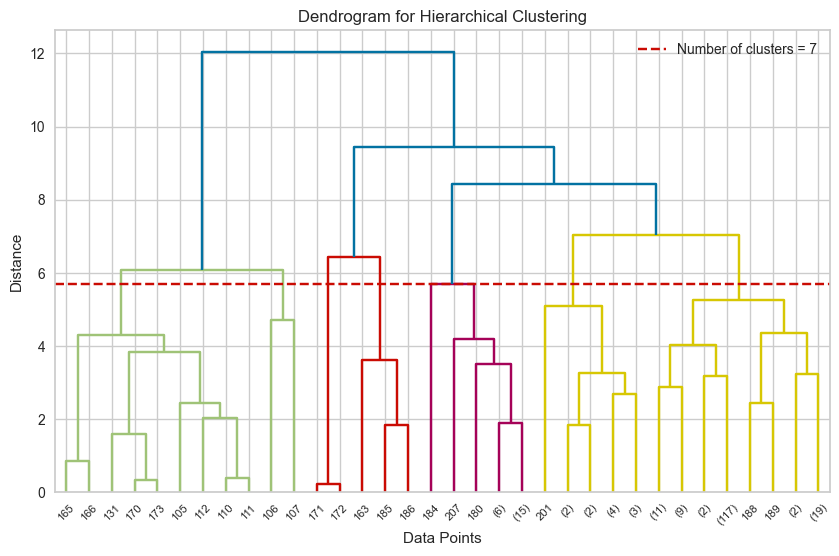

In [116]:
def plot_dendrogram_with_clusters(Z, num_clusters):
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(Z, truncate_mode='level', p=num_clusters-1)
    sorted_heights = sorted(Z[:, 2], reverse=True)
    height = sorted_heights[num_clusters - 1]
    plt.axhline(y=height, color='r', linestyle='--', label=f'Number of clusters = {num_clusters}')
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.legend()
    plt.show()

# Usage
Z = sch.linkage(df, method='complete', metric='euclidean')
plot_dendrogram_with_clusters(Z, num_clusters=7)


Based on the condensed dendogram, group each data based on its cluster. You can write code for your answer or just type the answer in the cell below. Your answer should be in this format:



*   Cluster 0: 1, 2, 3, 4
*   Cluster 1: 5, 6, 7
*   etc





> Answer:
Cluster 0: 165, 166, 131, 170, 173, 105, 112, 110, 111, 106, 107
Cluster 1: 171, 172, 163, 185, 186
Cluster 2: 184, 207, 180, (6), (15), 
Cluster 3: 201, (2), (2), (4), (3)
Cluster 4: (11), (9), (2), (117)
Cluster 5: 188, 189, (2), (19)







# DBSCAN Clustering

## [4a] Applying DBSCAN Clustering

Apply DBSCAN algorithm to cluster the normalized dataset and evaluate the performance using average silhouette score.

In [117]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, clusters)

# Display the silhouette score
print("Average silhouette score:", silhouette_avg)

Average silhouette score: 0.4941247592383799


## [4b] Hyperparameter Tuning on DBSCAN Clustering

Hyperparameter tuning is a process to search for the best hyperparameter (parameter that you can set manually in order to achieve the best model performance) in your model. For example, in DBSCAN, the hyperparameters are `eps`, `min_samples`, etc. Read more about hyperparameter tuning [here](https://aws.amazon.com/what-is/hyperparameter-tuning/).

Do the hyperparameter tuning to determine the best hyperparameter to maximize the average silhouette score. You can use `GridSearchCV` or `Optuna` library and you have to tune **at least 2** hyperparameters. Show the best hyperparameter configuration you got and the resulting silhouette score.

In [118]:
# you may want to install optuna if you want
# !pip install optuna

In [119]:
def optimize_dbscan(df_scaled, n_trials=100):
    def objective(trial):
        eps = trial.suggest_float('eps', 0.1, 1.0)
        min_samples = trial.suggest_int('min_samples', 2, 10)

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        silhouette_avg = silhouette_score(df_scaled, clusters)
        return silhouette_avg

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    
    best_params = study.best_params
    best_score = study.best_value
    
    return best_params, best_score

# Usage
best_params, best_score = optimize_dbscan(df_scaled)
print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)


[I 2024-03-02 18:52:26,447] A new study created in memory with name: no-name-0bc27ff3-9c0c-4a4a-9e76-abd5a3f8f06d
[I 2024-03-02 18:52:26,451] Trial 0 finished with value: 0.5087552725878687 and parameters: {'eps': 0.553172564094838, 'min_samples': 8}. Best is trial 0 with value: 0.5087552725878687.
[I 2024-03-02 18:52:26,454] Trial 1 finished with value: 0.5147383170339055 and parameters: {'eps': 0.586585617871474, 'min_samples': 3}. Best is trial 1 with value: 0.5147383170339055.
[I 2024-03-02 18:52:26,457] Trial 2 finished with value: 0.5744678971941249 and parameters: {'eps': 0.9774706172308512, 'min_samples': 10}. Best is trial 2 with value: 0.5744678971941249.
[I 2024-03-02 18:52:26,459] Trial 3 finished with value: 0.5744678971941249 and parameters: {'eps': 0.9445115537341069, 'min_samples': 7}. Best is trial 2 with value: 0.5744678971941249.
[I 2024-03-02 18:52:26,462] Trial 4 finished with value: -0.013549890283524843 and parameters: {'eps': 0.1113245839708756, 'min_samples': 4

Best Parameters: {'eps': 0.9774706172308512, 'min_samples': 10}
Best Silhouette Score: 0.5744678971941249


Apply DBSCAN clustering based on the best hyperparameter you got after tuning the model. Add a new column to normalized dataset (name: `dbscan_label`) which contains cluster labels for each datapoint and display the first 5 rows of dataframe.

In [121]:
def apply_dbscan(df, best_params):
    best_eps = best_params['eps']
    best_min_samples = best_params['min_samples']
    
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    clusters = dbscan.fit_predict(df)
    
    df['dbscan_label'] = clusters
    return df

# Usage
df_with_labels = apply_dbscan(df, best_params)
print(df_with_labels.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  dbscan_label
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0             0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0             0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0             0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0             0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0             0


## [4c] Clusters Visualization

Using the same procedure and parameters (and hyperparameters) as 2d, visualize the clusters formed by this DBSCAN algorithm.

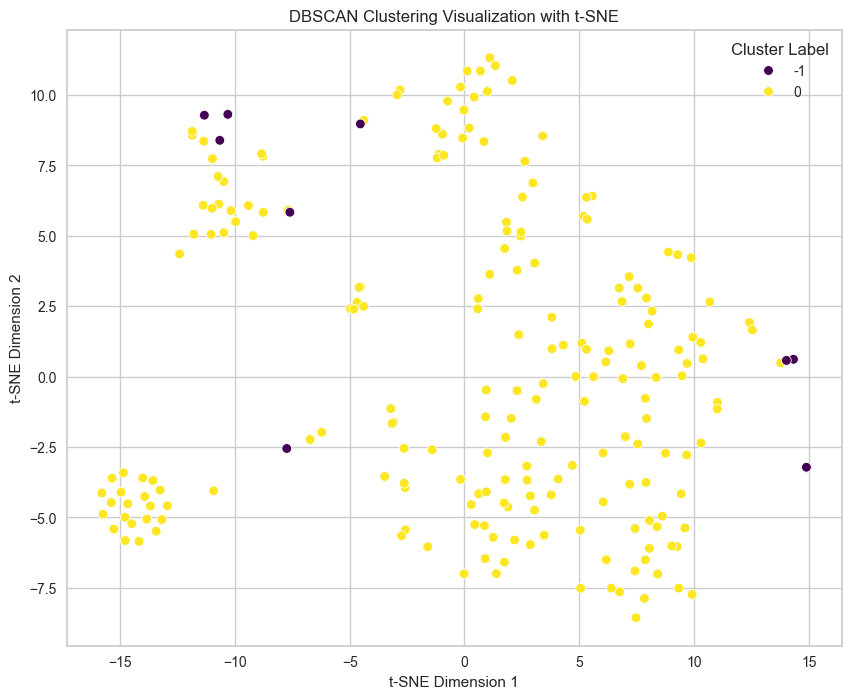

In [122]:
# TODO: visualize

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('DBSCAN Clustering Visualization with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster Label')
plt.show()

# Comparing Different Clustering Methods

Now, let's try to compare the performance between DBSCAN and K-Means algorithm on 'bizarre' datasets. How these two algorithms differ?

In [123]:
from sklearn import datasets

In [124]:
noisy_circles = datasets.make_circles(
    n_samples=500, factor=0.5, noise=0.05, random_state=19
)

noisy_moons = datasets.make_moons(
    n_samples=500, noise=0.05, random_state=19
)

In [125]:
noisy_circles_df = pd.DataFrame({'X': noisy_circles[0][:, 0], 'Y': noisy_circles[0][:, 1]})
noisy_moons_df = pd.DataFrame({'X': noisy_moons[0][:, 0], 'Y': noisy_moons[0][:, 1]})

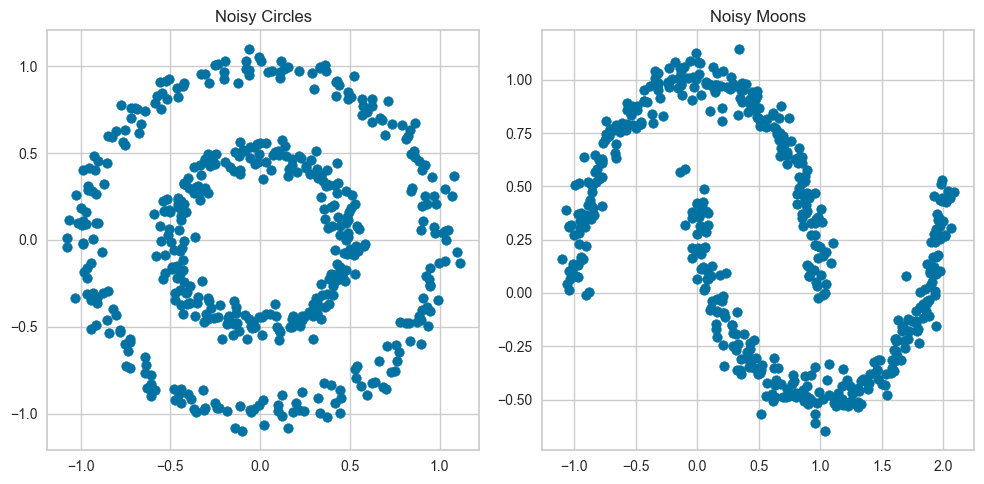

In [126]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Noisy Circles')
plt.scatter(noisy_circles_df['X'], noisy_circles_df['Y'])

plt.subplot(1, 2, 2)
plt.title('Noisy Moons')
plt.scatter(noisy_moons_df['X'], noisy_moons_df['Y'])

plt.tight_layout()
plt.show()

### [5a] Clustering by 'Common Sense' :)

From the scatterplots above, determine the expected clusters that should have emerged by the process of clustering. How many clusters? You can download the image and annotate the clusters using Paint, etc. Example:

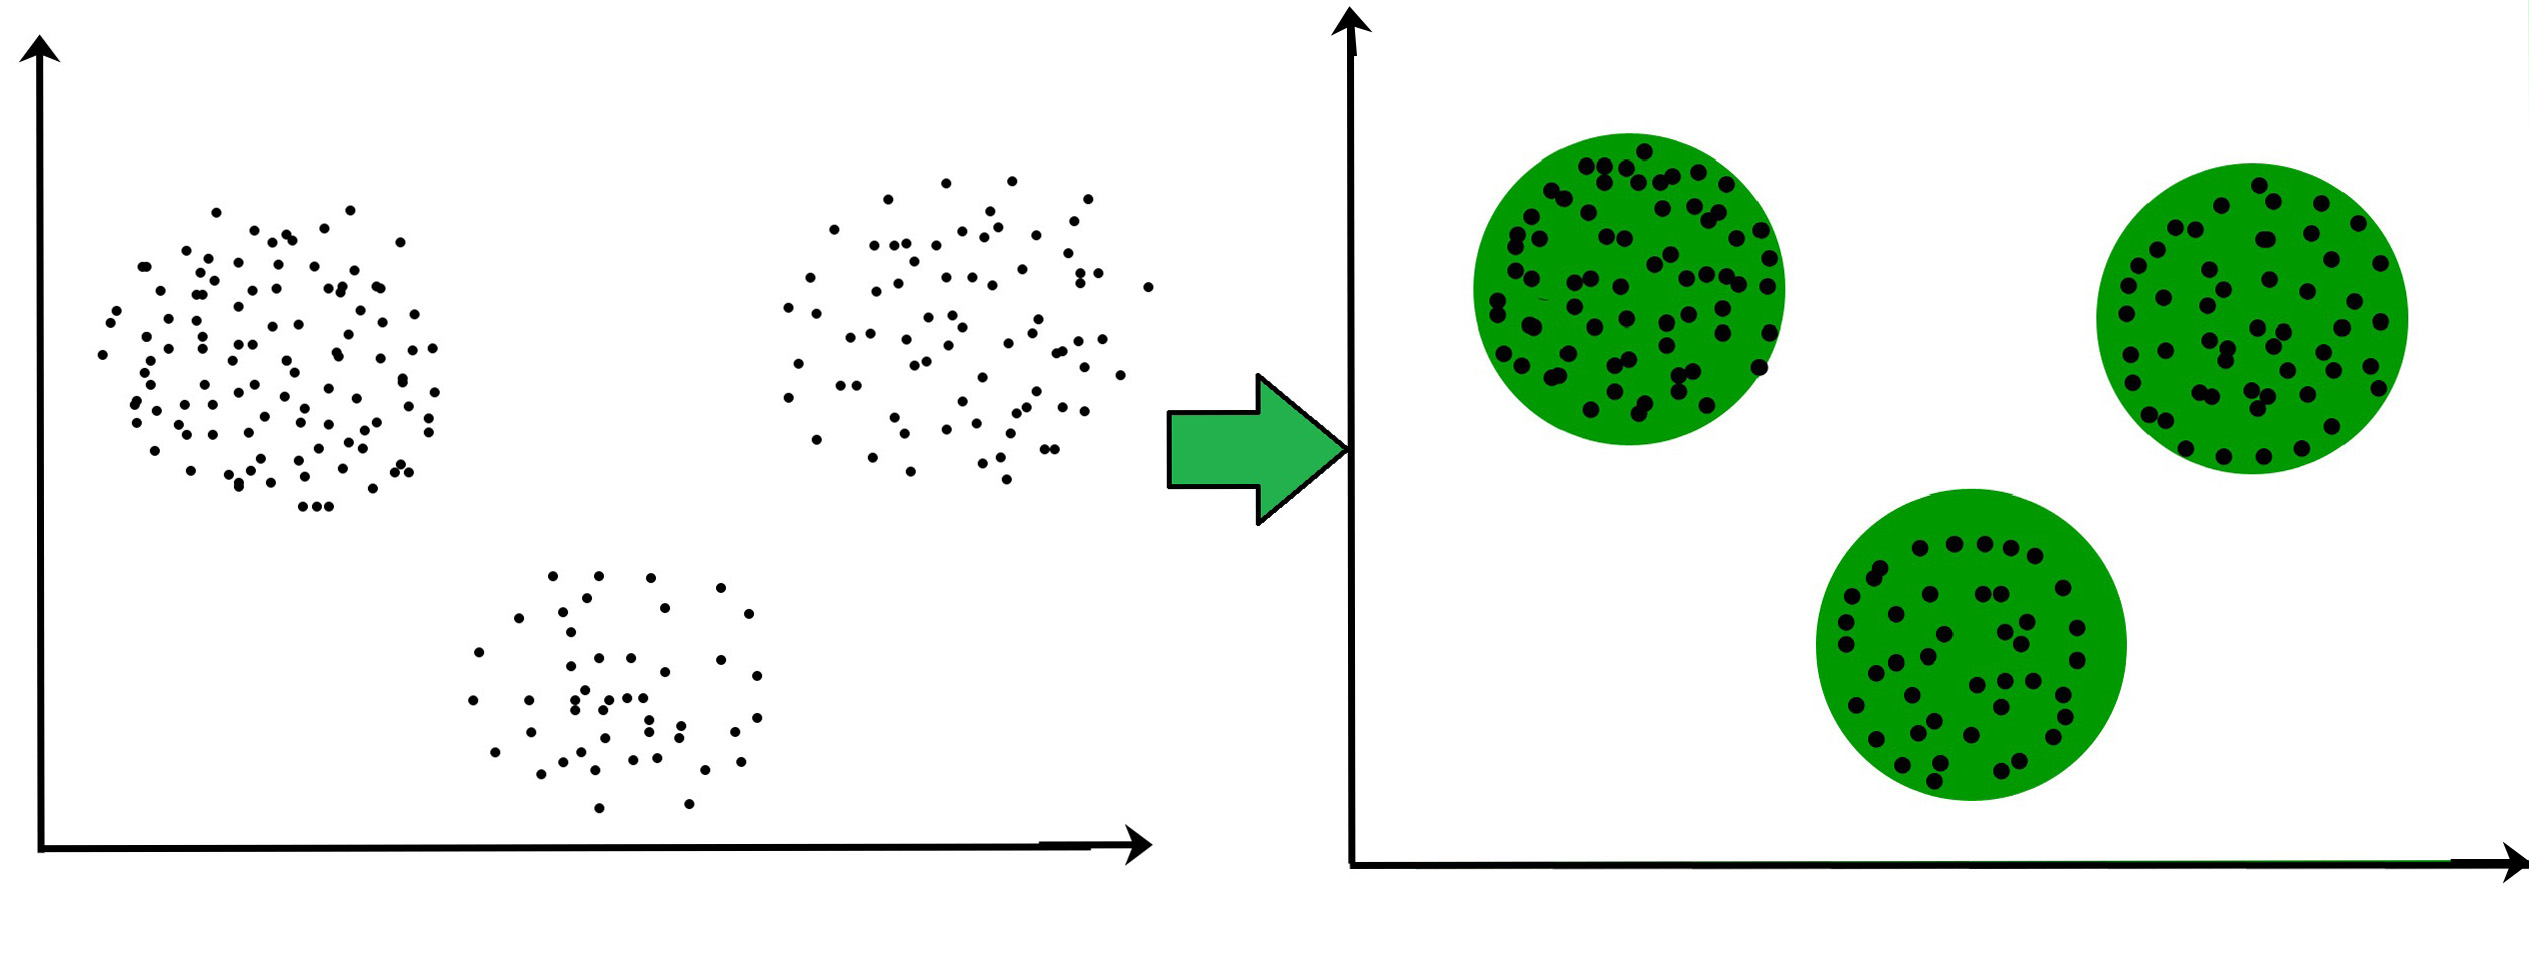

Source: https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg



> Answer: (Insert your image, the annotated image doesn't have to be neat, as long the differences between clusters are visible)

https://imgur.com/a/fghumH8

There are 2 clusters (for each DF) expected to be formed from the clustering process.

### [5b] Compare between K-Means and DBSCAN

Apply K-Means and DBSCAN algorithm to both datasets. Visualize the result using scatterplot. For K-Means, set the `n_clusters` based on the number of expected clusters you have mentioned before and `random_state = 19`. For DBSCAN, use `eps = 0.2` and `min_samples = 10`.

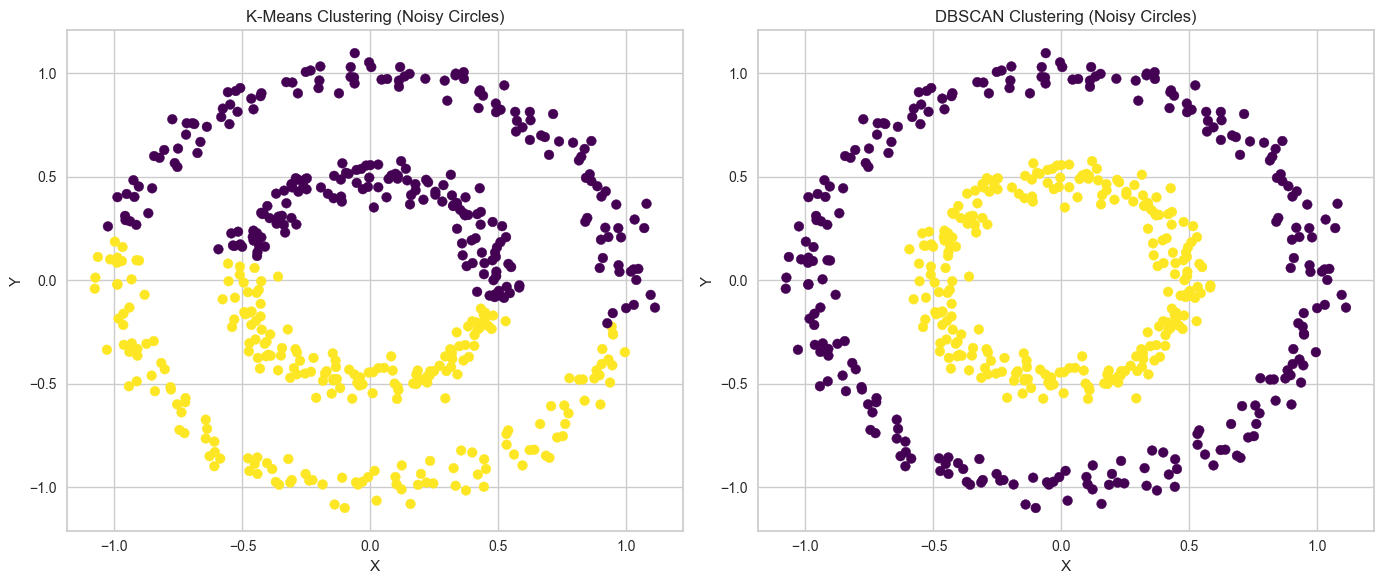

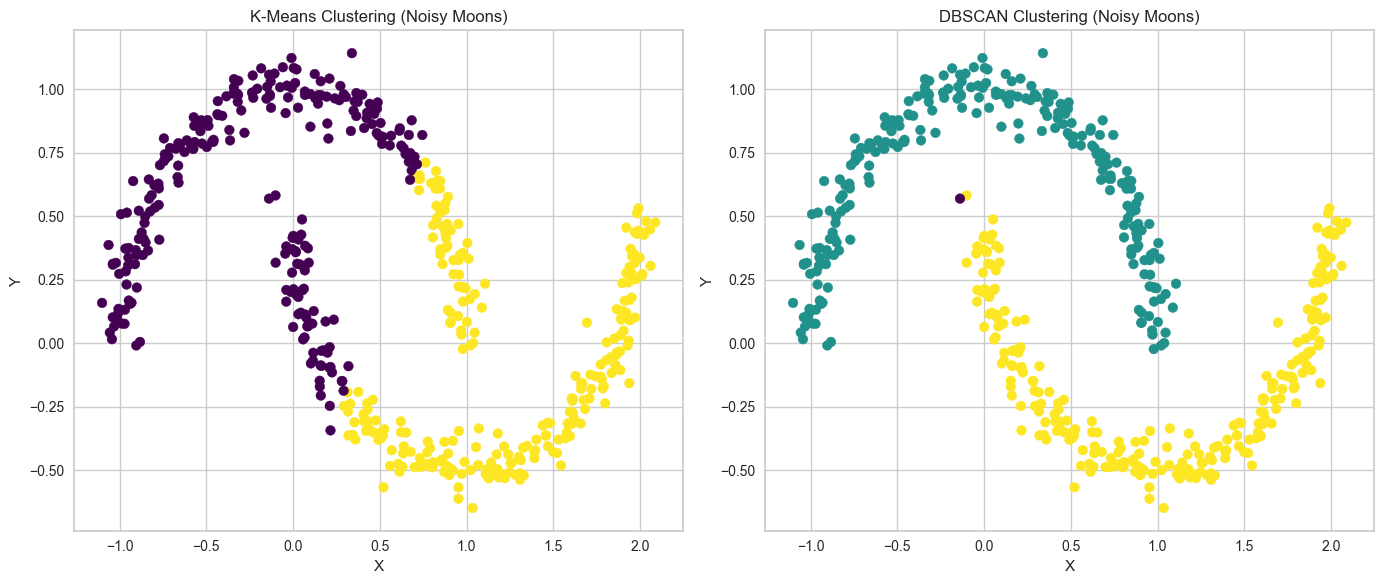

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn import datasets

# Generate noisy circles and moons datasets
noisy_circles = datasets.make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=19)
noisy_moons = datasets.make_moons(n_samples=500, noise=0.05, random_state=19)

# Convert datasets to dataframes
noisy_circles_df = pd.DataFrame({'X': noisy_circles[0][:, 0], 'Y': noisy_circles[0][:, 1]})
noisy_moons_df = pd.DataFrame({'X': noisy_moons[0][:, 0], 'Y': noisy_moons[0][:, 1]})

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=19)
noisy_circles_df['kmeans_label'] = kmeans.fit_predict(noisy_circles[0])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
noisy_circles_df['dbscan_label'] = dbscan.fit_predict(noisy_circles[0])

# Plot results for noisy circles dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(noisy_circles_df['X'], noisy_circles_df['Y'], c=noisy_circles_df['kmeans_label'], cmap='viridis')
plt.title('K-Means Clustering (Noisy Circles)')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(noisy_circles_df['X'], noisy_circles_df['Y'], c=noisy_circles_df['dbscan_label'], cmap='viridis')
plt.title('DBSCAN Clustering (Noisy Circles)')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=19)
noisy_moons_df['kmeans_label'] = kmeans.fit_predict(noisy_moons[0])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
noisy_moons_df['dbscan_label'] = dbscan.fit_predict(noisy_moons[0])

# Plot results for noisy moons dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(noisy_moons_df['X'], noisy_moons_df['Y'], c=noisy_moons_df['kmeans_label'], cmap='viridis')
plt.title('K-Means Clustering (Noisy Moons)')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(noisy_moons_df['X'], noisy_moons_df['Y'], c=noisy_moons_df['dbscan_label'], cmap='viridis')
plt.title('DBSCAN Clustering (Noisy Moons)')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


### [5c] Conclusion

Based on the experiment, which algorithm performs better at handling such bizarre datasets? Explain why do you think that algorithm is better than the other one. 



> Answer:
It is objectively proven that the DBSCANS is better. K-Means Clustering, from what we've seen, doesn't work as well as DBSCAN since it clustered the wrong group. Even though there are a few instances of outliers, it has grouped up the right clusters as opposed to K-Means clustering. From what I've seen DBSCANS can handle arbitrary shapes better, its more robust to noise, and best of all; you don't need to determine the number of cluters beforehand.


Does that mean we have to use that algorithm in doing all clustering tasks?



> Answer:
No as there are always a reason on why both of these techniques existed; they have their own plusses and minuses. One of them are the difference in time complexity where K-Means triumphs as the fastest over DBSCAN. It all depended on a numerous amounts of factors, including how the data set is plotted. K-Means are better for well-defined datasets, spherical clusters and when the number of clusters is known in advance, while DBSCAN can handle weird shapes and curves, etc.


# Exploration

In this part, we will use the previous `glass.csv` dataset in `df` dataframe.

In [128]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,dbscan_label
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


You will try to do clustering on this dataset such that the resulting clusters are similar to the `Type` column.

In [129]:
type_col

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In this case, how to measure the similarity? We will use a metric called **Rand Index**. This metric is used to measure the similarity between two data clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. (Source: [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html))

In a nutshell, Rand Index measures the similarity between two segmentations and is equal to the proportion of the agreement between two partitions. The values range from 0 (total disagreement) to 1 (total agreeement), which means higher score is better than the lower ones. The Rand Index is calculated as:

$$R=\frac{a+b}{_{n}C_{2}}$$
where:


*   $a$: number of times a pair of elements belongs to the same cluster across two clustering methods
*   $b$: number of times a pair of elements belongs to different clusters across two clustering methods
*   $_nC_2$: number of unordered pairs in a set of $n$ elements



Source: https://centre-borelli.github.io/ruptures-docs/code-reference/metrics/randindex/, https://www.statology.org/rand-index/

You can use either DBSCAN, K-Means, or Hierarchical Clustering to do this task. You may do hyperparameter tuning or feature engineering to maximize the Rand Index. Your result is expected to have Rand Index above **0.68**. Elaborate your process to get the desired Rand Index.

In the end of this section, create a new dataframe (you can copy from `df` dataframe) with a new column `label`, which contains the assigned cluster for each datapoint and display the first 5 rows.

**Do note that the number of formed clusters should be 6, the same amount of clusters as the original classes. Prove this by showing the result after applying `value_counts()` for `label` column at the end of the process!**

Below is the example on how to use `rand_score`.

Good luck and happy exploring!

In [130]:
from sklearn.metrics.cluster import rand_score

In [131]:
kmeans = KMeans(n_clusters=6)
kmeans_cluster = kmeans.fit_predict(df)
kmeans_cluster

array([5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 5,
       1, 5, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 3, 3, 3, 0, 0,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 0, 0, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0,
       5, 5, 5, 5, 1, 0, 0, 0, 2, 1, 1, 1, 5, 5, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [132]:
rand_score(type_col, kmeans_cluster)

0.6497740336097583

In [133]:
# TODO: time to explore
# remember to show the resulting dataset (with labels), number of clusters, and rand index score you got

# Good Luck!